Image Segmentation with Python and Unsupervised Learning
========================================================

![image](./images/butterfly.jpg)

Import libraries.

In [5]:
#!pip install opencv-python

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Load image from file and display it.

In [2]:
img = cv2.imread('images/butterfly.jpg')
print(type(img))
print(img.shape)
print(img[25,10])

<class 'numpy.ndarray'>
(425, 640, 3)
[10 48 50]


Display image.

In [6]:
cv2.imshow('image', img)
cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

Flatten image, and display in 3-D color space.

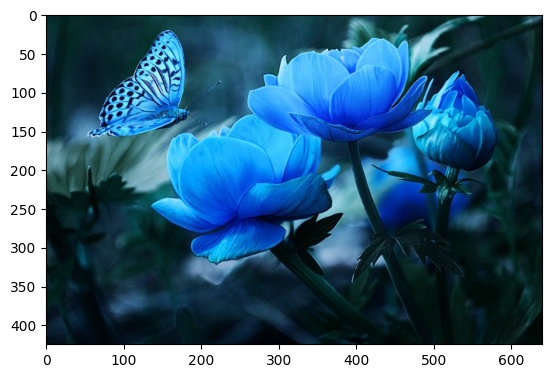

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)


In [14]:
#!pip install ipympl
#conda install -c conda-forge ipympl

In [14]:
#%pip install ipympl


In [15]:
#%matplotlib notebook
%matplotlib ipympl
#%matplotlib widget
#%matplotlib nbAgg
#%matplotlib inline

#%matplotlib nbAgg
#%matplotlib inline

#['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']


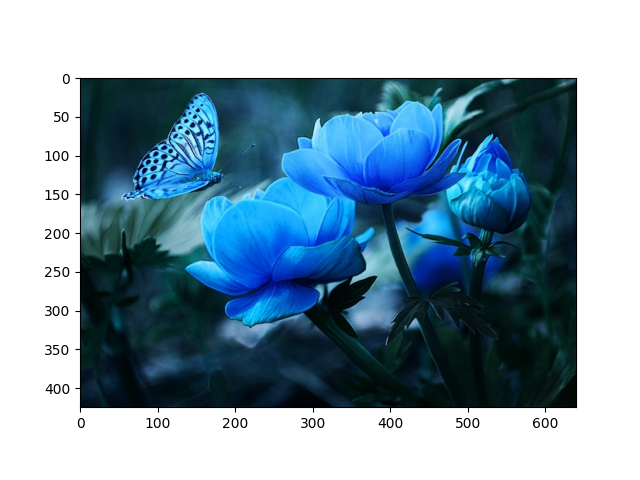

In [16]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [30]:
import matplotlib as mpl
#mpl.use('Gtk3Agg') # or mpl.use('Gtk3Cairo')
print(mpl.get_backend()) # check if backend was set
import matplotlib.pyplot as plt

nbagg


(272000, 3)


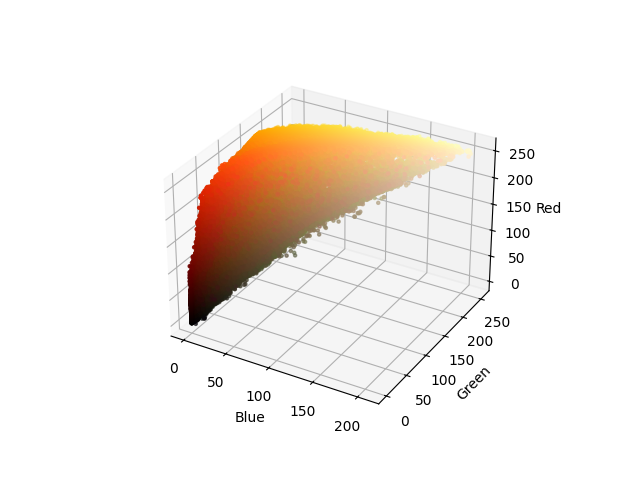

In [27]:
flat = np.reshape(img, (-1, 3))
print(flat.shape)
colors = flat[:,[2,1,0]] / 255.0 # BGR -> RGB and normalize to [0,1]
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(
    flat[:,0], 
    flat[:,1], 
    flat[:,2], 
    c=colors,
    marker = "."
    )
ax.set_xlabel('Blue')
ax.set_ylabel('Green')
ax.set_zlabel('Red')

plt.show()
#plt.clf()
#plt.close()


In [28]:
#plt.close()
#plt.clf()
#plt.imshow(img)
#plt.show()
print(flat.shape)

(272000, 3)


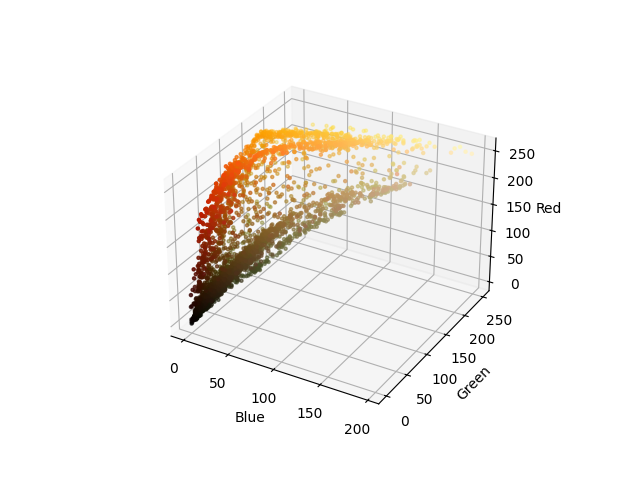

In [30]:
flat = np.reshape(img, (-1, 3))
idx = np.random.choice(flat.shape[0], 5000)
sampled_flat = flat[idx]


colors = sampled_flat[:,[2,1,0]] / 255.0 # BGR -> RGB and normalize to [0,1]
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(
    sampled_flat[:,0], 
    sampled_flat[:,1], 
    sampled_flat[:,2], 
    c=colors,
    marker = "."
    )
ax.set_xlabel('Blue')
ax.set_ylabel('Green')
ax.set_zlabel('Red')

plt.show()

K-means.

In [45]:
K = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)
ssd, best_labels, centers = cv2.kmeans(
    flat.astype(np.float32), 
    K = K,
    bestLabels = None, 
    criteria = criteria, 
    attempts= 10, 
    flags= cv2.KMEANS_RANDOM_CENTERS
    )

Plotting cluster centers in RGB space.

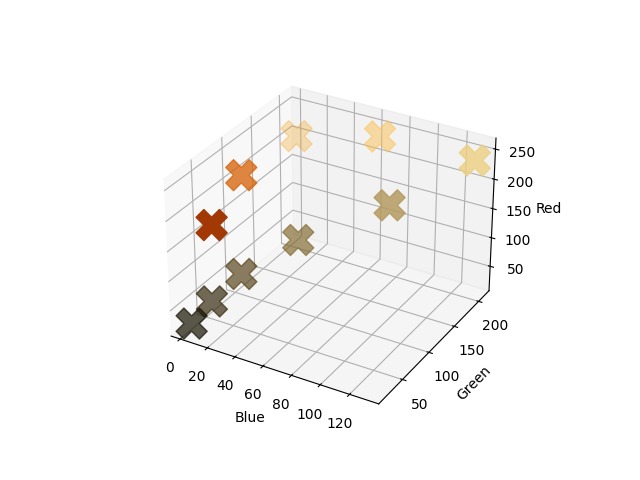

In [46]:

colors = centers[:,[2,1,0]] / 255.0 # BGR -> RGB and normalize to [0,1]
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(
    centers[:,0], 
    centers[:,1], 
    centers[:,2], 
    c=colors,
    marker = "X",
    s=500
    )
ax.set_xlabel('Blue')
ax.set_ylabel('Green')
ax.set_zlabel('Red')

plt.show()

Plot segmented image.

In [47]:
print(centers, centers.shape)

[[  2.6389978  20.556438   23.309725 ]
 [130.35477   208.37749   235.51907  ]
 [ 45.949886  103.6372    127.63919  ]
 [ 20.880526   64.11886    84.65309  ]
 [ 70.52919   190.21056   251.52083  ]
 [ 91.907524  152.19597   178.64558  ]
 [ 22.474459  159.58032   244.6922   ]
 [  3.5807917  56.42582   161.90561  ]
 [  7.2700334  99.168304  214.5367   ]
 [  9.5747595  39.468395   50.264847 ]] (10, 3)


In [48]:
centers = centers.astype(np.uint8)
print(centers, centers.shape)

[[  2  20  23]
 [130 208 235]
 [ 45 103 127]
 [ 20  64  84]
 [ 70 190 251]
 [ 91 152 178]
 [ 22 159 244]
 [  3  56 161]
 [  7  99 214]
 [  9  39  50]] (10, 3)


In [50]:
print(best_labels,best_labels.shape)
segmented_flat = centers[best_labels] # .flatten()
segmented_image = segmented_flat.reshape(img.shape)

cv2.imshow('segmented image', segmented_image)  
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

[[9]
 [9]
 [9]
 ...
 [0]
 [0]
 [0]] (272000, 1)


-1

Elbow method.

In [53]:
Ks = []
distances = []

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)

for K in range(2,16):
    ssd, best_labels, centers = cv2.kmeans(
        flat.astype(np.float32), 
        K = K,
        bestLabels = None, 
        criteria = criteria, 
        attempts= 10, 
        flags= cv2.KMEANS_RANDOM_CENTERS
        )
    Ks.append(K)
    distances.append(ssd)
    print(f"K={K}, SSD={ssd}")



K=2, SSD=767929564.3735087
K=3, SSD=468048370.84757745
K=4, SSD=344875685.01388943
K=5, SSD=277329440.77459294
K=6, SSD=214666736.04545277
K=7, SSD=176908792.80612415
K=8, SSD=152953153.6008877
K=9, SSD=129263861.79965542
K=10, SSD=114463174.53912526
K=11, SSD=105301370.15945208
K=12, SSD=94997257.66761686
K=13, SSD=89774572.48696268
K=14, SSD=81222008.18954077
K=15, SSD=76138465.34741774


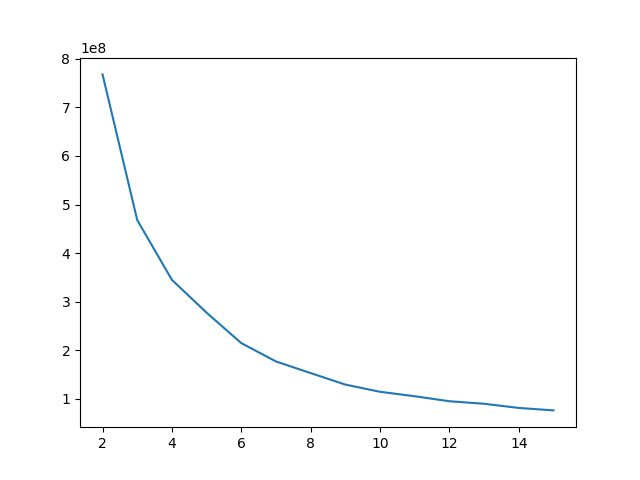

In [57]:
plt.close()
fig = plt.figure()
plt.plot(Ks, distances)
plt.show()

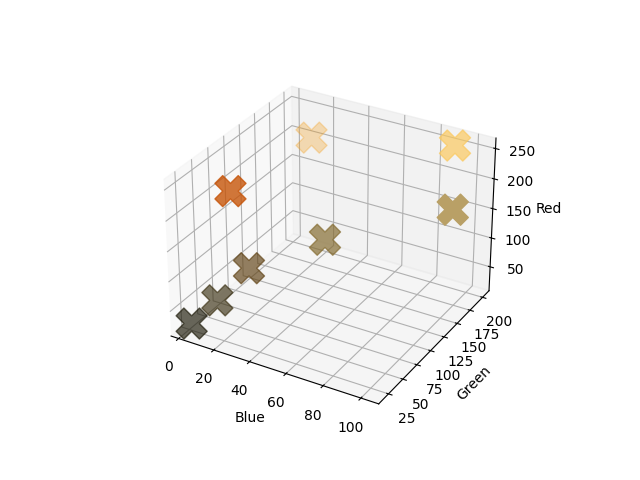

In [58]:
K = 8
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)
ssd, best_labels, centers = cv2.kmeans(
    flat.astype(np.float32), 
    K = K,
    bestLabels = None, 
    criteria = criteria, 
    attempts= 10, 
    flags= cv2.KMEANS_RANDOM_CENTERS
    )



colors = centers[:,[2,1,0]] / 255.0 # BGR -> RGB and normalize to [0,1]
fig = plt.figure()
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.scatter(
    centers[:,0], 
    centers[:,1], 
    centers[:,2], 
    c=colors,
    marker = "X",
    s=500
    )
ax.set_xlabel('Blue')
ax.set_ylabel('Green')
ax.set_zlabel('Red')

plt.show()

In [68]:
centers = centers.astype(np.uint8)
centerscopy = centers.copy()
print("Centers: ",centers, centers.shape)
print("best_labels: ",best_labels,best_labels.shape)

centerscopy[0:5,:]= [0,0,0]
centerscopy[6:,:]= [0,0,0]
print(f"centerscopy: {centerscopy}")

segmented_flat = centerscopy[best_labels] # .flatten()
segmented_image = segmented_flat.reshape(img.shape)

cv2.imshow('segmented image', segmented_image)  
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

Centers:  [[ 10  41  53]
 [ 91 200 250]
 [  5  81 198]
 [ 20  65  95]
 [ 48 107 132]
 [102 160 185]
 [ 25 158 243]
 [  2  21  24]] (8, 3)
best_labels:  [[0]
 [0]
 [0]
 ...
 [7]
 [7]
 [7]] (272000, 1)
centerscopy: [[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [102 160 185]
 [  0   0   0]
 [  0   0   0]]


-1

array([10, 41, 53], dtype=uint8)